In [1]:
%load_ext autoreload
%autoreload 2

import network
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Aufgabe 3
Berechne die relative Perkolationscluster größe für 40 verschiedene $p$ mit $L=2^{13}$ und trage diese über $(p-p_c)^{5/36}$ auf.

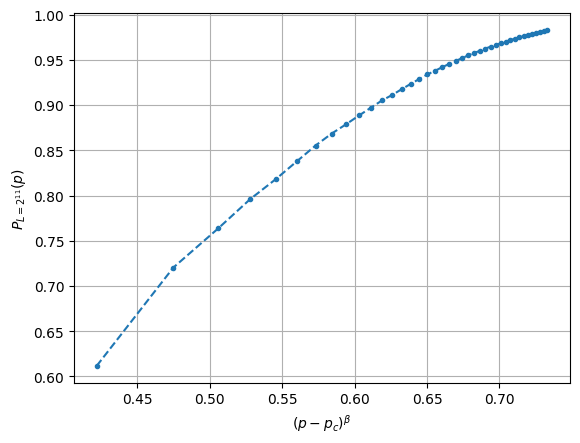

In [7]:
@jit()
def get_relative_size_of_largest_percolating_cluster(net: network.Network):
    return net.N[net.get_largest_percolating_cluster()] / net.get_total_occupied_spots()

@jit()
def calc_size(ps, pc):
    L=2**13
    PL = []
    for p in ps:
        net = network.Network(L, L, p)
        net.hoshen_kopelman()
        while not net.is_percolating():
            net = network.Network(L, L, p)
            net.hoshen_kopelman()
        PL.append(get_relative_size_of_largest_percolating_cluster(net))
    return PL
    
pc = 0.593
ps = np.linspace(pc+0.002, 0.70, 40)
beta = 5.0 / 36.0
PL = calc_size(ps, pc)
fig, ax = plt.subplots()
ax.plot((ps - pc)**beta, PL, '.--')
ax.set_xlabel('$(p-p_c)^\\beta$')
ax.set_ylabel('$P_{L=2^{11}}(p)$')
#ax.set_ylim(0.7, 0.8)
plt.grid(True)

$P_\infty \propto (p-p_c)^{5/36}$ kann bestätigt werde von $\approx 59,5\% - 62,5\%$. \
$P_\infty(p_c)=0$ da bei unendlich großen Gittern es unendlich mehr besetzte Plätze gibt die nicht zum Perkolationscluster gehören.

In [12]:
print((0.625-pc)**beta)

0.6199860837917995
